# Τεχνικές Εξόρυξης Δεδομένων - 2η Άσκηση
Φοιτητές: Καμμάς Ζήσης : sdi2000290,
          Φωτόπουλος Δημήτριος : sdi2000292

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
# import spacy
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download the stopwords corpus
nltk.download('stopwords')
nltk.download('punkt')

import gensim
import pickle

%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Read the csv

In [2]:
df = pd.read_csv('books_1.Best_Books_Ever.csv', sep=',')


In [3]:
df.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [4]:
print(f"total rows: {df.shape[0]}")

total rows: 52478


In [5]:
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


## Handling NaN values

In [6]:
df.isna().sum()

bookId                  0
title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
isbn                    0
genres                  0
characters              0
bookFormat           1473
edition             47523
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
setting                 0
coverImg              605
bbeScore                0
bbeVotes                0
price               14365
dtype: int64

In [7]:
# Αφαιρούμε τις γραμμές που έχουν κενό description και publishdate
df = df.dropna(subset=['description', 'publishDate'])
df.isna().sum()

bookId                  0
title                   0
series              27425
author                  0
rating                  0
description             0
language             3238
isbn                    0
genres                  0
characters              0
bookFormat            872
edition             45604
pages                1691
publisher            2696
publishDate             0
firstPublishDate    20379
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          493
setting                 0
coverImg              305
bbeScore                0
bbeVotes                0
price               13193
dtype: int64

# Προεπεξεργασία

## Χωρισμός των ratings

In [8]:
df['ratingsByStars'] = df['ratingsByStars'].apply(eval) # Μετατροπή των περιεχομένων σε λίστα, με χρήση της eval

# Αφαιρούμε και τα rows που έχουν ratings της μορφής [], και δεν τα έπιασε η df.isna()
df['ratings_len'] = df['ratingsByStars'].apply(len)
df = df[df['ratings_len'] !=0].copy()
df = df.drop('ratings_len', axis=1)

# Δημιουργία των στηλών ratingStar5/4/3... με παράλληλη μετατροπή των δεδομένων σε integers
for i in range(5,0,-1):
  df[f'ratingStar{i}'] = df['ratingsByStars'].apply(lambda x: x[5-i]).astype(int)

In [9]:
df[['ratingsByStars','ratingStar5','ratingStar4','ratingStar3','ratingStar2','ratingStar1']]

,ratingsByStars,ratingStar5,ratingStar4,ratingStar3,ratingStar2,ratingStar1
0,"[3444695, 1921313, 745221, 171994, 93557]",3444695,1921313,745221,171994,93557
1,"[1593642, 637516, 222366, 39573, 14526]",1593642,637516,222366,39573,14526
2,"[2363896, 1333153, 573280, 149952, 80794]",2363896,1333153,573280,149952,80794
3,"[1617567, 816659, 373311, 113934, 76770]",1617567,816659,373311,113934,76770
4,"[1751460, 1113682, 1008686, 542017, 548674]",1751460,1113682,1008686,542017,548674
...,...,...,...,...,...,...
52473,"[311, 310, 197, 42, 11]",311,310,197,42,11
52474,"[16, 14, 5, 2, 0]",16,14,5,2,0
52475,"[2109, 1868, 1660, 647, 390]",2109,1868,1660,647,390
52476,"[77, 78, 59, 19, 5]",77,78,59,19,5


## genreSingle

In [10]:
df['genres'] = df['genres'].apply(eval) 

df['genres_length'] = df['genres'].apply(len)
df = df[df['genres_length'] !=0].copy() # αφαιρούμε τις γραμμές όπου δεν υπάρχουν genres, αλλά δεν φαίνονται σαν NaN γιατί είναι της μορφής []
df = df.drop('genres_length', axis=1)

df['genreSingle'] = df['genres'].apply(lambda x: x[0])
df[['genres', 'genreSingle']]


,genres,genreSingle
0,"[Young Adult, Fiction, Dystopia, Fantasy, Scie...",Young Adult
1,"[Fantasy, Young Adult, Fiction, Magic, Childre...",Fantasy
2,"[Classics, Fiction, Historical Fiction, School...",Classics
3,"[Classics, Fiction, Romance, Historical Fictio...",Classics
4,"[Young Adult, Fantasy, Romance, Vampires, Fict...",Young Adult
...,...,...
52473,"[Vampires, Paranormal, Young Adult, Romance, F...",Vampires
52474,"[Mystery, Young Adult]",Mystery
52475,"[Fantasy, Young Adult, Paranormal, Angels, Rom...",Fantasy
52476,"[Fiction, Mystery, Historical Fiction, Adventu...",Fiction


## Publish Date

In [11]:
df['publishDate'] = pd.to_datetime(df['publishDate'], errors='coerce')
print(df['publishDate'])
print(f"{df['publishDate'].isna().sum()} rows could not be converted to datetime and will be dropped")
df = df.dropna(subset=['publishDate']) # Πετάμε τις λίγες γραμμές όπου οι τιμές δεν μπόρεσαν να μετατραπούν σε datetime

0       2008-09-14
1       2004-09-28
2       2006-05-23
3       2000-10-10
4       2006-09-06
           ...    
52473   2011-05-28
52474   2011-08-05
52475   2011-03-18
52476   2011-09-01
52477   2011-05-08
Name: publishDate, Length: 46503, dtype: datetime64[ns]
582 rows could not be converted to datetime and will be dropped


In [12]:
df['publishYear'] = df['publishDate'].dt.year
df['publishYear']

<ipython-input-12-6e2436e8e9bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['publishYear'] = df['publishDate'].dt.year


0        2008
1        2004
2        2006
3        2000
4        2006
         ... 
52473    2011
52474    2011
52475    2011
52476    2011
52477    2011
Name: publishYear, Length: 45921, dtype: int64

# ΔΙΑΓΡΑΜΜΑΤΑ




## (2.4) Οι πιο συχνές λέξεις στους τίτλους βιβλίων


In [13]:
df = df[df['language'] == 'English'] # κρατάμε μόνο τα βιβλία στα αγγλικά

In [14]:
text = " ".join(list(df['title'])) # Όλες οι λέξεις των τίτλων σε μια λίστα

Removing stopwords

In [15]:
words = word_tokenize(text) # Χωρισμός σε μεμονωμένες λέξεις

stop_words = set(stopwords.words('english')) # Ενα σετ με τα αγγλικά stopwords

contractions = ["'s", "n't"] # Κάποια επιπλέον που θέλουμε να αφαιρεθούν

# Αφαίρεση σημείων στίξης, stopwords, contractions, αριθμών
words = [word for word in words if word not in string.punctuation and word not in contractions and not word.isdigit() and word.casefold() not in stop_words]

filtered_text = ' '.join(words) # Το καθαρισμένο κείμενο 
print(filtered_text)

Hunger Games Harry Potter Order Phoenix Kill Mockingbird Pride Prejudice Twilight Book Thief Animal Farm Chronicles Narnia J.R.R Tolkien 4-Book Boxed Set Hobbit Lord Rings Gone Wind Fault Stars Hitchhiker Guide Galaxy Giving Tree Wuthering Heights Da Vinci Code Memoirs Geisha Picture Dorian Gray Alice Adventures Wonderland Looking-Glass Jane Eyre Les Misérables Fahrenheit Divergent Lord Flies Romeo Juliet Alchemist Crime Punishment Perks Wallflower Great Gatsby City Bones Ender Game Help Anne Green Gables Harry Potter Sorcerer Stone Little Prince Charlotte Web Mice Men Time Traveler Wife Dracula Brave New World One Hundred Years Solitude Catcher Rye Princess Bride Lightning Thief Secret Garden Thousand Splendid Suns Wrinkle Time Game Thrones Adventures Huckleberry Finn Lovely Bones Outsiders Wild Things Green Eggs Ham Odyssey Life Pi Tale Two Cities Water Elephants Lolita Slaughterhouse-Five Frankenstein Text Kite Runner Handmaid Tale Giver Catch-22 Dune Pillars Earth Stand Adventures 

The most common words in Titles

In [16]:
most_common_words = pd.DataFrame(words)
print("The 20 most common words in book titles:")
print(most_common_words.value_counts().head(20))

The 20 most common words in book titles:
Life       776
Love       625
Vol        586
Story      579
World      525
Book       445
One        424
Man        409
Stories    375
Last       372
Volume     332
Dark       331
Girl       329
Death      328
Night      319
War        311
Time       299
Secret     281
History    275
God        274
dtype: int64


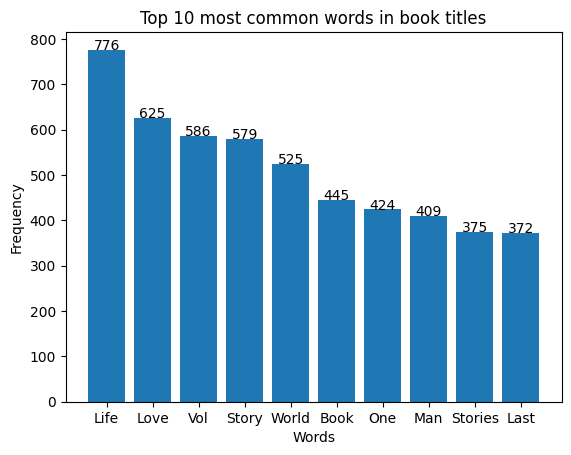

In [17]:
ten_most_common = most_common_words.value_counts().head(10)

ten_most_common = ten_most_common.reset_index(name='Frequency')
ten_most_common.columns = ['Word', 'Frequency']

plt.bar(ten_most_common['Word'], ten_most_common['Frequency'])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 10 most common words in book titles")

# Προσθήκη των τιμών πάνω από κάθε μπάρα
for index, value in enumerate(ten_most_common['Frequency']):
  plt.text(index, value, str(value), horizontalalignment = "center")


## (2.1)Ιστόγραμμα Ratings 

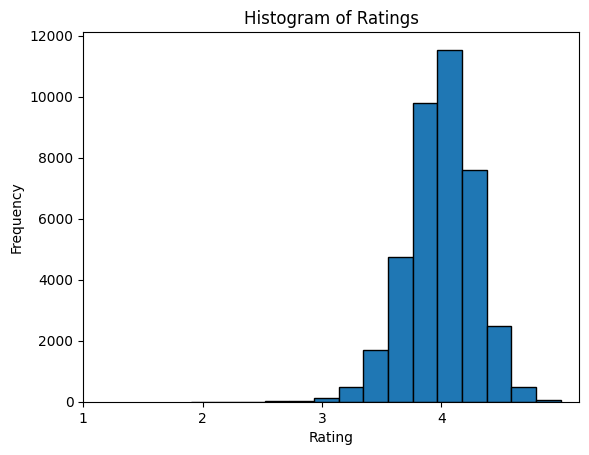

In [18]:
plt.hist(df['rating'], bins=15, edgecolor='black')
plt.xticks(range(1, 5))
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')
plt.show()



## (2.2) Τα 10 βιβλία με τις περισσότερες σελίδες.

In [19]:
df['pages'] = pd.to_numeric(df['pages'], errors='coerce') # Μετατροπή της στήλης pages σε αριθμητικά
top_pages = df.nlargest(10,'pages')
print("The 10 books with the most pages:")
print(top_pages[['title','pages']])

The 10 books with the most pages:
                                                   title    pages
11490                          The Story of Civilization  14777.0
22960                         The Complete Wheel of Time  11095.0
8374             The Complete Malazan Book of the Fallen   8258.0
5098                                           Animorphs   8245.0
20098                                          Homestuck   8124.0
3148                                                Worm   6680.0
4692      The Complete Aubrey/Maturin Novels (5 Volumes)   6576.0
1679                              A Song of Ice and Fire   5216.0
38814  One Piece Box Set 3: Thriller Bark to New Worl...   5056.0
38247  One Piece Box Set 2: Skypeia and Water Seven: ...   4936.0


## (2.5) Οι 10 συγγραφείς με τα περισσότερα βιβλία.

In [20]:
authors_with_most_books = df['author'].value_counts()
top10 = authors_with_most_books.nlargest(10)
print(top10)


Nora Roberts (Goodreads Author)       85
Agatha Christie                       69
Stephen King (Goodreads Author)       62
Bella Forrest (Goodreads Author)      49
Erin Hunter                           49
Terry Pratchett                       48
Meg Cabot (Goodreads Author)          48
Karen Kingsbury (Goodreads Author)    48
Mercedes Lackey                       43
Carolyn Keene                         42
Name: author, dtype: int64


Text(0.5, 1.0, 'Authors that wrote the most books')

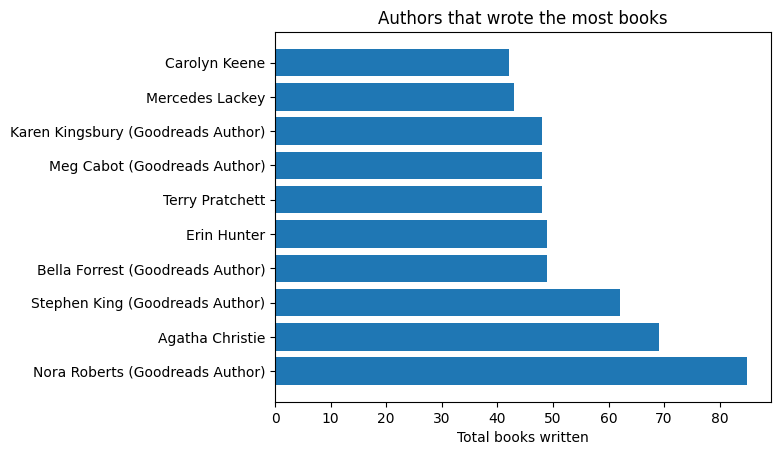

In [21]:
top10 = top10.reset_index(name='Author')
top10.columns=['Author','Books']

plt.barh(top10['Author'],top10['Books'])
plt.xlabel('Total books written')
plt.title("Authors that wrote the most books")


## (2.6) Οι 10 συγγραφείς με τις περισσότερες κριτικές.


In [ ]:
authors_with_most_ratings = df.groupby('author')['numRatings'].sum()
authors_with_most_ratings.sort_values(ascending=False).head(10)

author
J.K. Rowling, Mary GrandPré (Illustrator)    17790643
Suzanne Collins                              11654607
Stephenie Meyer                              10709044
Stephen King (Goodreads Author)              10025253
Rick Riordan (Goodreads Author)               8111644
Dan Brown (Goodreads Author)                  7014203
J.R.R. Tolkien                                6620587
J.K. Rowling                                  6462880
John Green (Goodreads Author)                 6355092
Cassandra Clare (Goodreads Author)            5637877
Name: numRatings, dtype: int64

# TFIDF

In [ ]:
# το df_ θα είναι το δοκιμαστικό dataframe με λιγότερα rows, για να τρέχουν τα πράγματα γρηγορότερα
test_rows = 15000 # <-- ΠΟΣΑ ROWS ΘΑ ΔΟΚΙΜΑΣΟΥΜΕ

df_ = df.iloc[:test_rows]
# df_ = df.copy()

## TfidfVectorizer for unigrams and bigrams

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer_unigrams = TfidfVectorizer(max_df=1.0, min_df=1, max_features=10000, stop_words='english', ngram_range = (1, 1), lowercase=True)
tfidf_vectorizer_bigrams = TfidfVectorizer(max_df=1.0, min_df=1, max_features=10000, stop_words='english', ngram_range = (2, 2), lowercase=True)
tfidf_matrix_unigrams = tfidf_vectorizer_unigrams.fit_transform(list(df_['description']))
tfidf_matrix_bigrams = tfidf_vectorizer_bigrams.fit_transform(list(df_['description']))
print(tfidf_matrix_unigrams)

  (0, 5426)	0.05147738684203406
  (0, 5297)	0.04193103352395998
  (0, 4433)	0.09931007633914685
  (0, 9768)	0.13268327630126953
  (0, 1632)	0.11376520764298484
  (0, 5536)	0.0920223546644131
  (0, 8447)	0.09436530858289047
  (0, 9839)	0.10250220939769458
  (0, 5692)	0.10463458738288003
  (0, 7214)	0.08360866680898142
  (0, 6060)	0.09342288769627954
  (0, 7870)	0.08559847109424226
  (0, 8721)	0.19770114601175515
  (0, 2336)	0.07660640783819227
  (0, 1731)	0.09359916915268371
  (0, 8159)	0.08538780349945675
  (0, 3706)	0.11660525648818035
  (0, 8492)	0.12217348201957086
  (0, 7940)	0.14267736724835858
  (0, 6280)	0.05890797468654995
  (0, 9965)	0.06294212689551054
  (0, 8169)	0.1064297150678188
  (0, 9290)	0.12100066727339656
  (0, 5356)	0.07820374105965665
  (0, 3546)	0.08532799850751781
  :	:
  (14999, 6080)	0.1346068429252853
  (14999, 5984)	0.08647212817763034
  (14999, 1375)	0.10583013653512749
  (14999, 9191)	0.1152190104669268
  (14999, 4837)	0.10065991216971826
  (14999, 2643)	0.

In [ ]:
tfidf_matrix_unigrams.shape

(15000, 10000)

## DBs for unigrams and bigrams

In [ ]:
dist_uni = cosine_similarity(tfidf_matrix_unigrams)

In [ ]:
dist_bi = cosine_similarity(tfidf_matrix_bigrams)

In [ ]:
recom_db_unigrams = pd.DataFrame(index=list(df_['bookId']),data=dist_uni, columns=list(df_['bookId']))
recom_db_unigrams

,2767052-the-hunger-games,2.Harry_Potter_and_the_Order_of_the_Phoenix,2657.To_Kill_a_Mockingbird,1885.Pride_and_Prejudice,41865.Twilight,19063.The_Book_Thief,170448.Animal_Farm,11127.The_Chronicles_of_Narnia,30.J_R_R_Tolkien_4_Book_Boxed_Set,18405.Gone_with_the_Wind,...,129911.China_Men,3486806-clear-as-the-moon,123845.Self_Reliance_and_Other_Essays,15760.Dark_Rivers_of_the_Heart,290376.Indira,5168977-vacations-from-hell,311179.Bath_Tangle,3141295-the-children-of-hurin-the-silmarillion-the-hobbit-the-lord-of-the-rings,29036.The_Great_Influenza,7685763-indulgence-in-death
2767052-the-hunger-games,1.000000,0.003931,0.026091,0.009282,0.025082,0.027514,0.012143,0.015127,0.001592,0.037528,...,0.018217,0.000000,0.013976,0.016571,0.013507,0.005156,0.010924,0.001192,0.030023,0.042431
2.Harry_Potter_and_the_Order_of_the_Phoenix,0.003931,1.000000,0.000000,0.000000,0.011562,0.000000,0.000000,0.010693,0.008333,0.000000,...,0.000000,0.017361,0.000000,0.043722,0.009256,0.005627,0.002352,0.003953,0.079350,0.005840
2657.To_Kill_a_Mockingbird,0.026091,0.000000,1.000000,0.034080,0.055944,0.040621,0.036203,0.049837,0.031047,0.000000,...,0.000000,0.013724,0.018391,0.031689,0.020380,0.017350,0.008995,0.020693,0.018943,0.027826
1885.Pride_and_Prejudice,0.009282,0.000000,0.034080,1.000000,0.000000,0.034569,0.057798,0.018366,0.007332,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.021425,0.000000,0.004365,0.039906,0.006992,0.000000
41865.Twilight,0.025082,0.011562,0.055944,0.000000,1.000000,0.010785,0.000000,0.000000,0.005275,0.000000,...,0.000000,0.000000,0.014913,0.021458,0.039402,0.012314,0.009942,0.000000,0.000000,0.022343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168977-vacations-from-hell,0.005156,0.005627,0.017350,0.000000,0.012314,0.013088,0.022234,0.011454,0.007769,0.000000,...,0.000000,0.015897,0.000000,0.024126,0.003641,1.000000,0.011397,0.026179,0.016645,0.020557
311179.Bath_Tangle,0.010924,0.002352,0.008995,0.004365,0.009942,0.013982,0.000000,0.002212,0.016513,0.021468,...,0.002312,0.007890,0.000000,0.019999,0.011615,0.011397,1.000000,0.012438,0.005083,0.020550
3141295-the-children-of-hurin-the-silmarillion-the-hobbit-the-lord-of-the-rings,0.001192,0.003953,0.020693,0.039906,0.000000,0.074789,0.062476,0.086782,0.272987,0.000000,...,0.001480,0.008505,0.015312,0.009637,0.009874,0.026179,0.012438,1.000000,0.024881,0.000616
29036.The_Great_Influenza,0.030023,0.079350,0.018943,0.006992,0.000000,0.011268,0.029909,0.026658,0.018725,0.000000,...,0.018561,0.022102,0.005879,0.028208,0.013472,0.016645,0.005083,0.024881,1.000000,0.034781


In [ ]:
# Δημιουργία ενός dictionary για τα unigrams όπου κάθε βιβλίο θα έχει την σχέση του (cosine similarity) με κάθε άλλο βιβλίο (και κρατάμε τα 100 πιο σχετικά) 
recom_dict_unigrams = {}

for i in range(len(recom_db_unigrams)):
  book_id = recom_db_unigrams.index[i]
  most_similar_books = recom_db_unigrams.loc[book_id].sort_values(ascending=False)[1:101] # Ξεκινάμε από το 1 και όχι από το 0 για να μην έχει μέσα τον εαυτό του
  
  recom_dict_unigrams[book_id] = tuple(zip(most_similar_books.index, most_similar_books.values))

print(recom_dict_unigrams)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Δημιουργία ενός αντίστοιχου dictionary για τα bigrams
recom_db_bigrams = pd.DataFrame(index=list(df_['bookId']),data=dist_bi, columns=list(df_['bookId']))
recom_dict_bigrams = {}

for i in range(len(recom_db_bigrams)):
  book_id = recom_db_bigrams.index[i]
  most_similar_books = recom_db_bigrams.loc[book_id].sort_values(ascending=False)[1:101]

  recom_dict_bigrams[book_id] = tuple(zip(most_similar_books.index, most_similar_books.values))

In [ ]:
df_ = df_.set_index('bookId') # βάζουμε index το bookid για να χρησιμοποιούμε την .loc

In [ ]:
id1 = '2767052-the-hunger-games'                    # δοκιμαστικό id1
id2 = '2.Harry_Potter_and_the_Order_of_the_Phoenix' # δοκιμαστικό id2
df_.loc[id1, 'description']

"WINNING MEANS FAME AND FORTUNE.LOSING MEANS CERTAIN DEATH.THE HUNGER GAMES HAVE BEGUN. . . .In the ruins of a place once known as North America lies the nation of Panem, a shining Capitol surrounded by twelve outlying districts. The Capitol is harsh and cruel and keeps the districts in line by forcing them all to send one boy and once girl between the ages of twelve and eighteen to participate in the annual Hunger Games, a fight to the death on live TV.Sixteen-year-old Katniss Everdeen regards it as a death sentence when she steps forward to take her sister's place in the Games. But Katniss has been close to dead before—and survival, for her, is second nature. Without really meaning to, she becomes a contender. But if she is to win, she will have to start making choices that weight survival against humanity and life against love."

In [ ]:
recom_dict_unigrams[id2][:5]

(('5.Harry_Potter_and_the_Prisoner_of_Azkaban', 0.43270854870611297),
 ('15881.Harry_Potter_and_the_Chamber_of_Secrets', 0.3818698230980853),
 ('3.Harry_Potter_and_the_Sorcerer_s_Stone', 0.3015867910825694),
 ('6.Harry_Potter_and_the_Goblet_of_Fire', 0.252738791858974),
 ('2002.Harry_Potter_Schoolbooks_Box_Set', 0.2495637158301781))

## Recommendation function

In [ ]:
# Δημιουργία συνάρτησης που προτείνει τα N πιο όμοια βιβλία
def recommend(id, n, recommentation_dict, info_df):
  n_similar_books_tuple = recommentation_dict[id][:n]
  print(f"Recommending {n} books similar to {info_df.loc[id, 'title']}")
  print("-"*30)
  for similar_id, score in n_similar_books_tuple:
    similar_title = info_df.loc[similar_id, 'title']
    similar_description = info_df.loc[similar_id, 'description']
    similar_score = score
    print(f"Recomdended: {similar_title}")
    print(f"Description: {similar_description}")
    print(f"(score: {similar_score})\n")
    # print(similar_title, similar_description, similar_score)

In [ ]:
# 5 προτάσεις βιβλίων σχετικών με το Harry Potter and the Order of the Phoenix, με βάση το dict με τα unigrams
# Προτείνονται τα άλλα βιβλία Harry Potter
recommend(id2, 5, recom_dict_unigrams, df_) 

Recommending 5 books similar to Harry Potter and the Order of the Phoenix
------------------------------
Recomdended: Harry Potter and the Prisoner of Azkaban
Description: Harry Potter's third year at Hogwarts is full of new dangers. A convicted murderer, Sirius Black, has broken out of Azkaban prison, and it seems he's after Harry. Now Hogwarts is being patrolled by the dementors, the Azkaban guards who are hunting Sirius. But Harry can't imagine that Sirius or, for that matter, the evil Lord Voldemort could be more frightening than the dementors themselves, who have the terrible power to fill anyone they come across with aching loneliness and despair. Meanwhile, life continues as usual at Hogwarts. A top-of-the-line broom takes Harry's success at Quidditch, the sport of the Wizarding world, to new heights. A cute fourth-year student catches his eye. And he becomes close with the new Defense of the Dark Arts teacher, who was a childhood friend of his father. Yet despite the relative s

In [ ]:
# 5 προτάσεις βιβλίων σχετικών με το πρώτο βιβλίο της σειράς The Hunger Games, με βάση το dict με τα bigrams
# προτείνονται τα άλλα Hunger Games
recommend(id1, 5, recom_dict_bigrams, df_)

Recommending 5 books similar to The Hunger Games
------------------------------
Recomdended: The Hunger Games: Official Illustrated Movie Companion
Description: Go behind the scenes of the making of The Hunger Games with exclusive images and interviews. From the screenwriting process to the casting decisions to the elaborate sets and costumes to the actors' performances and directors' vision, this is the definitive companion to the breathtaking film.
(score: 0.5265386414740059)

Recomdended: SAMPLER ONLY: Catching Fire (The Hunger Games, #2)
Description: Against all odds, Katniss Everdeen has won the annual Hunger Games with fellow district tribute Peeta Mellark. But it was a victory won by defiance of the Capitol and their harsh rules. The Capitol is angry. The Capitol wants revenge. Suzanne Collins continues the amazing story of Katniss Everdeen in Catching Fire, the second novel of the phenomenal Hunger Games trilogy. Read Chapters one and two to find out what happens next.
(score: 

# Classification

## Description cleaning

In [ ]:
most_common_genres = list(df['genreSingle'].value_counts()[:10].index)
df_clf = df[df['genreSingle'].isin(most_common_genres)]
df_clf = df_clf.set_index('bookId')
df_clf = df_clf[['description', 'genreSingle']]
df_clf # To dataset μόνο με τα χαρακτηριστικά που χρειαζόμαστε

,description,genreSingle
bookId,,
2767052-the-hunger-games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Young Adult
2.Harry_Potter_and_the_Order_of_the_Phoenix,There is a door at the end of a silent corrido...,Fantasy
2657.To_Kill_a_Mockingbird,The unforgettable novel of a childhood in a sl...,Classics
1885.Pride_and_Prejudice,Alternate cover edition of ISBN 9780679783268S...,Classics
41865.Twilight,About three things I was absolutely positive.\...,Young Adult
...,...,...
12464361-elemental,When seventeen-year-old Kara Nightingale is su...,Fantasy
12395883-unbelievable,Lilah Lopez Dreser's in town to take care of u...,Romance
11836711-anasazi,"'Anasazi', sequel to 'The Thirteenth Chime' by...",Mystery


In [ ]:
# Δημιουργία συνάρτησης που καθαρίζει το κείμενο
def clean_text(text):

    words = word_tokenize(text) # σπάσιμο του κειμένου σε λέξεις

    stop_words = set(stopwords.words('english')) # τα αγγλικά stopwords σε ένα set
    
    contractions = ["'s", "n't"]

    # Remove punctuation, contractions, and stopwords
    words = [word.lower() for word in words if word not in string.punctuation and word not in contractions and not word.isdigit() and word.casefold() not in stop_words]
    
    return words

In [ ]:
# Εφαρμογή της συνάρτησης σε όλα τα discriptions
df_clf['description_cleaned'] = df_clf['description'].apply(clean_text) 
df_clf['description_cleaned']

bookId
2767052-the-hunger-games                       [winning, means, fame, fortune.losing, means, ...
2.Harry_Potter_and_the_Order_of_the_Phoenix    [door, end, silent, corridor, ’, haunting, har...
2657.To_Kill_a_Mockingbird                     [unforgettable, novel, childhood, sleepy, sout...
1885.Pride_and_Prejudice                       [alternate, cover, edition, isbn, 978067978326...
41865.Twilight                                 [three, things, absolutely, positive, first, e...
                                                                     ...                        
12464361-elemental                             [seventeen-year-old, kara, nightingale, sudden...
12395883-unbelievable                          [lilah, lopez, dreser, town, take, care, unfin...
11836711-anasazi                               ['anasazi, sequel, 'the, thirteenth, chime, em...
10815662-marked                                [--, readers, favorite, awards, winner, --, si...
11330278-wayward-son   

## word2vec

Το training του word2vec παίρνει χρόνο.
Δεν τα ξανατρέχουμε, διαβάζουμε τα .pkl αρχεία 

In [ ]:
# Δοκιμή με λιγότερα rows
sample_data = 10000 # <-- ΠΟΣΑ ROWS ΝΑ ΔΟΚΙΜΑΣΟΥΜΕ
df_clf_sample = df_clf.iloc[:sample_data].copy() # all data
df_clf_sample

,description,genreSingle,description_cleaned
bookId,,,
2767052-the-hunger-games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Young Adult,"[winning, means, fame, fortune.losing, means, ..."
2.Harry_Potter_and_the_Order_of_the_Phoenix,There is a door at the end of a silent corrido...,Fantasy,"[door, end, silent, corridor, ’, haunting, har..."
2657.To_Kill_a_Mockingbird,The unforgettable novel of a childhood in a sl...,Classics,"[unforgettable, novel, childhood, sleepy, sout..."
1885.Pride_and_Prejudice,Alternate cover edition of ISBN 9780679783268S...,Classics,"[alternate, cover, edition, isbn, 978067978326..."
41865.Twilight,About three things I was absolutely positive.\...,Young Adult,"[three, things, absolutely, positive, first, e..."
...,...,...,...
46917.Rabbit_Redux,"In this sequel to Rabbit, Run, John Updike res...",Fiction,"[sequel, rabbit, run, john, updike, resumes, s..."
769896.Poland,"Like the heroic land that is its subject, Jame...",Historical Fiction,"[like, heroic, land, subject, james, michener,..."
1220721.What_I_Was,An unusual coming-of-age story that examines t...,Young Adult,"[unusual, coming-of-age, story, examines, flui..."


In [ ]:
# Αρχικοποίηση του Word2Vec model (Με όλα τα δεδομένα)
desciptions = list(df_clf['description_cleaned'])
model_w2v = gensim.models.Word2Vec(
    desciptions,
    vector_size=200,    # desired no. of features/independent variables 300
    window=5,           # context window size
    min_count=2,        # words that appear less than 'min_count' times will be ignored
    sg = 1,             # 1 for skip-gram model
    hs = 0,
    negative = 10,      # for negative sampling
    workers= 2,         # no.of cores
    seed = 34)
model_w2v.train(desciptions, total_examples= len(desciptions), epochs=20) # epochs 20
vocabulary = list(model_w2v.wv.index_to_key)

In [ ]:
# Δημιουργία συνάρτησης που βρίσκει τον μέσο όρο των embeddings για κάθε description 
def find_mean_vector(words, model_w2v, vocabulary):
    vectors = []
    for word in words:
        if word in vocabulary: # παίρνουμε μόνο τις λέξεις που είναι μέσα στο vocabulary, γιατί κάποιες λέξεις του discription μπορεί να μην είναι (λόγω του min_count)
            vectors.append(model_w2v.wv[word])    
    return np.array(vectors).mean(axis=0)

In [ ]:
# Εφαρμογή της συνάρτησης σε κάθε description και ταυτόχρονη δημιουργία μιας νέας στήλης
df_clf['word2vec'] = df_clf['description_cleaned'].apply(lambda x: find_mean_vector(x, model_w2v, vocabulary))
df_clf

<ipython-input-41-223b59c72f70>:7: RuntimeWarning: Mean of empty slice.
  return np.array(vectors).mean(axis=0)


,description,genreSingle,description_cleaned,word2vec
bookId,,,,
2767052-the-hunger-games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Young Adult,"[winning, means, fame, fortune.losing, means, ...","[0.22007094, -0.13296795, 0.11402068, 0.117108..."
2.Harry_Potter_and_the_Order_of_the_Phoenix,There is a door at the end of a silent corrido...,Fantasy,"[door, end, silent, corridor, ’, haunting, har...","[0.21964666, -0.16612978, 0.061975196, 0.09135..."
2657.To_Kill_a_Mockingbird,The unforgettable novel of a childhood in a sl...,Classics,"[unforgettable, novel, childhood, sleepy, sout...","[0.0891651, -0.30240855, -0.044731926, 0.22076..."
1885.Pride_and_Prejudice,Alternate cover edition of ISBN 9780679783268S...,Classics,"[alternate, cover, edition, isbn, 978067978326...","[0.086810425, -0.3989971, -0.011672062, 0.2122..."
41865.Twilight,About three things I was absolutely positive.\...,Young Adult,"[three, things, absolutely, positive, first, e...","[0.16405609, -0.23348293, 0.1062945, 0.1460983..."
...,...,...,...,...
12464361-elemental,When seventeen-year-old Kara Nightingale is su...,Fantasy,"[seventeen-year-old, kara, nightingale, sudden...","[0.20677575, -0.09112861, 0.2083069, 0.0923276..."
12395883-unbelievable,Lilah Lopez Dreser's in town to take care of u...,Romance,"[lilah, lopez, dreser, town, take, care, unfin...","[0.26448587, -0.21828921, 0.17718123, 0.105448..."
11836711-anasazi,"'Anasazi', sequel to 'The Thirteenth Chime' by...",Mystery,"['anasazi, sequel, 'the, thirteenth, chime, em...","[0.17046323, -0.13171884, 0.0922306, 0.1360718..."


## Αποθήκευση σε .pkl

In [ ]:
# σπάσιμο των vectors σε ξεχωριστά columns (για το classification)
df_clf = pd.concat([df_clf, df_clf['word2vec'].apply(pd.Series)], axis=1)
df_clf

,description,genreSingle,description_cleaned,word2vec,0,1,2,3,4,5,...,190,191,192,193,194,195,196,197,198,199
bookId,,,,,,,,,,,,,,,,,,,,,
2767052-the-hunger-games,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,Young Adult,"[winning, means, fame, fortune.losing, means, ...","[0.22007094, -0.13296795, 0.11402068, 0.117108...",0.220071,-0.132968,0.114021,0.117109,-0.233700,0.008659,...,-0.046178,-0.226698,0.223880,0.008863,0.119230,0.011514,-0.139385,-0.141686,0.230157,0.196334
2.Harry_Potter_and_the_Order_of_the_Phoenix,There is a door at the end of a silent corrido...,Fantasy,"[door, end, silent, corridor, ’, haunting, har...","[0.21964666, -0.16612978, 0.061975196, 0.09135...",0.219647,-0.166130,0.061975,0.091353,-0.288474,0.131453,...,0.019740,-0.202921,0.302499,0.063826,0.172581,0.116551,-0.126253,-0.171729,0.279125,0.251006
2657.To_Kill_a_Mockingbird,The unforgettable novel of a childhood in a sl...,Classics,"[unforgettable, novel, childhood, sleepy, sout...","[0.0891651, -0.30240855, -0.044731926, 0.22076...",0.089165,-0.302409,-0.044732,0.220760,-0.286555,0.100728,...,-0.006385,-0.293942,0.292805,-0.083899,0.207445,0.031590,-0.143269,-0.086144,0.227856,0.346191
1885.Pride_and_Prejudice,Alternate cover edition of ISBN 9780679783268S...,Classics,"[alternate, cover, edition, isbn, 978067978326...","[0.086810425, -0.3989971, -0.011672062, 0.2122...",0.086810,-0.398997,-0.011672,0.212224,-0.376999,0.040751,...,0.007716,-0.196018,0.343949,-0.044539,0.184427,0.049209,-0.210741,-0.067460,0.324435,0.263747
41865.Twilight,About three things I was absolutely positive.\...,Young Adult,"[three, things, absolutely, positive, first, e...","[0.16405609, -0.23348293, 0.1062945, 0.1460983...",0.164056,-0.233483,0.106294,0.146098,-0.223821,0.122423,...,0.164944,-0.244144,0.261270,0.049635,0.210879,0.067575,-0.088126,-0.093423,0.235617,0.161169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12464361-elemental,When seventeen-year-old Kara Nightingale is su...,Fantasy,"[seventeen-year-old, kara, nightingale, sudden...","[0.20677575, -0.09112861, 0.2083069, 0.0923276...",0.206776,-0.091129,0.208307,0.092328,-0.354738,0.191984,...,0.069914,-0.251578,0.148510,0.084446,0.092296,0.138844,-0.159079,-0.157328,0.291818,0.158192
12395883-unbelievable,Lilah Lopez Dreser's in town to take care of u...,Romance,"[lilah, lopez, dreser, town, take, care, unfin...","[0.26448587, -0.21828921, 0.17718123, 0.105448...",0.264486,-0.218289,0.177181,0.105448,-0.317650,0.132345,...,0.069458,-0.060405,0.248347,0.027671,0.195073,0.033238,-0.122183,-0.189524,0.069755,0.282071
11836711-anasazi,"'Anasazi', sequel to 'The Thirteenth Chime' by...",Mystery,"['anasazi, sequel, 'the, thirteenth, chime, em...","[0.17046323, -0.13171884, 0.0922306, 0.1360718...",0.170463,-0.131719,0.092231,0.136072,-0.289218,0.115034,...,0.150113,-0.274134,0.291865,0.058979,0.070883,0.049611,-0.212970,-0.054266,0.238732,0.295572


In [ ]:
pickle.dump(df_clf, open('features_sample_all.pkl', 'wb'))

In [ ]:
features = pickle.load(open('features_sample_all.pkl', 'rb'))
df_clf = features.drop(columns=['description', 'description_cleaned', 'word2vec'])
print(f"rows before dropna: {df_clf.shape[0]}")
df_clf = df_clf.dropna()
print(f"rows for classification: {df_clf.shape[0]}")

rows before dropna: 24093
rows for classification: 24092


In [ ]:
df_clf


,genreSingle,0,1,2,3,4,5,6,7,8,...,190,191,192,193,194,195,196,197,198,199
bookId,,,,,,,,,,,,,,,,,,,,,
2767052-the-hunger-games,Young Adult,0.188933,-0.150568,0.070180,0.009825,-0.225118,0.029341,-0.206451,-0.070983,0.263298,...,-0.000686,-0.215123,0.170095,0.113501,0.171059,0.007312,-0.121090,-0.150239,0.263107,0.112767
2.Harry_Potter_and_the_Order_of_the_Phoenix,Fantasy,0.174902,-0.209926,-0.003470,-0.022729,-0.256642,0.132028,-0.194377,-0.114880,0.215774,...,0.074360,-0.177690,0.191983,0.051525,0.228449,0.041336,-0.179574,-0.185486,0.288344,0.283008
2657.To_Kill_a_Mockingbird,Classics,0.033690,-0.318257,0.050809,0.156558,-0.301478,0.186685,-0.217227,-0.118354,0.199313,...,-0.006238,-0.260202,0.289562,-0.105858,0.135608,0.008019,-0.149529,-0.118642,0.240692,0.318960
1885.Pride_and_Prejudice,Classics,0.169900,-0.266453,0.058427,0.179443,-0.441942,0.203103,-0.294663,-0.236211,0.115559,...,-0.014119,-0.215208,0.358288,-0.043717,0.133235,0.002783,-0.275998,-0.072969,0.233308,0.225593
41865.Twilight,Young Adult,0.067153,-0.151388,-0.006313,0.001341,-0.265463,0.222131,-0.055506,-0.124328,0.190807,...,0.169456,-0.217550,0.262693,0.028031,0.117341,-0.026020,-0.131179,-0.129895,0.286002,0.147987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12464361-elemental,Fantasy,0.087416,-0.161759,0.055552,0.001902,-0.301882,0.180950,-0.059905,-0.093961,0.295852,...,0.053434,-0.250994,0.137318,0.107146,0.280964,0.026772,-0.114038,-0.041422,0.249707,0.191740
12395883-unbelievable,Romance,0.206664,-0.207100,0.147653,0.076997,-0.224016,0.163526,-0.171858,-0.069952,0.219214,...,0.040280,-0.047202,0.123295,0.023102,0.186519,0.012266,-0.174371,-0.122045,0.235192,0.173269
11836711-anasazi,Mystery,0.192249,-0.136668,0.007553,0.157399,-0.288573,0.150026,-0.170357,-0.115188,0.297517,...,0.074446,-0.205604,0.341908,0.022376,0.057270,0.007617,-0.220656,-0.040281,0.236729,0.224110


## Train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_clf.drop(columns=['genreSingle']), df_clf['genreSingle'], test_size=0.2, random_state=42)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

nbclf = gnb.fit(X_train, y_train)
nbclf_predicted = nbclf.predict(X_test)

In [ ]:
nbclf.score(X_train, y_train)
nbclf.score(X_test, y_test)

0.5453413571280349

## Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rndfr = RandomForestClassifier()
rndfr.fit(X_train, y_train)
rndfr_predicted  = rndfr.predict(X_test)

## Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='linear')
svm.fit(X_train,y_train)
svm_predicted = svm.predict(X_test)

## SVM with GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = {'kernel': ['linear', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001]}
grid_search = GridSearchCV(estimator=SVC(), param_grid=grid_params, cv=5)
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [ ]:
grid_search_predicted = best_model.predict(X_test)

In [ ]:
print(f"{best_model = } \n{best_params = }")

best_model = SVC(C=10, gamma=0.1) 
best_params = {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


## Αποθήκευση των predictions των μοντέλων σε .pkl

In [ ]:
# Αποθήκευση όλων των predictions σε ένα array, και αυτό σε ένα αρχείο pickle
predictions = np.array([nbclf_predicted, rndfr_predicted, svm_predicted, grid_search_predicted])
pickle.dump(predictions, open('clf_predictions.pkl', 'wb'))

In [ ]:
# Ανοιγμα του αρχείου και διάβασμα των predictions
myfile = pickle.load(open('clf_predictions.pkl', 'rb'))

pred_array = []
for prediction in myfile:
  pred_array.append(prediction)

# Διάβασμα των προβλέψεων στα ονόματα που είχαν πριν
nbclf_predicted, rndfr_predicted, svm_predicted, grid_search_predicted = pred_array

# ΠΙΝΑΚΕΣ ΑΠΟΤΕΛΕΣΜΑΤΩΝ

In [ ]:
from sklearn import metrics
print(f"Classification report for classifier {nbclf}")
print(metrics.classification_report(y_test,nbclf_predicted))
print("-"*60,'\n')
print(f"Classification report for classifier {rndfr}")
print(metrics.classification_report(y_test,rndfr_predicted))
print("-"*60,'\n')
print(f"Classification report for classifier {svm}")
print(metrics.classification_report(y_test,svm_predicted))
print("-"*60,'\n')
print(f"Classification report for classifier {grid_search}")
print(metrics.classification_report(y_test,grid_search_predicted))

Classification report for classifier GaussianNB()
                    precision    recall  f1-score   support

          Classics       0.18      0.43      0.25       180
           Fantasy       0.77      0.60      0.68       945
           Fiction       0.61      0.42      0.50       981
Historical Fiction       0.45      0.50      0.47       385
            Horror       0.42      0.28      0.34       168
           Mystery       0.68      0.67      0.67       376
        Nonfiction       0.69      0.58      0.63       434
           Romance       0.49      0.77      0.60       551
   Science Fiction       0.64      0.49      0.56       261
       Young Adult       0.44      0.50      0.47       538

          accuracy                           0.55      4819
         macro avg       0.54      0.53      0.52      4819
      weighted avg       0.58      0.55      0.55      4819

------------------------------------------------------------ 

Classification report for classifier RandomF

# 10-fold Cross Validation

In [ ]:
# Cross Validation for SVM
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

tenfoldsvm = SVC(kernel='linear')
metrics = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']
svm_scores = cross_validate(tenfoldsvm, df_clf.drop(columns=['genreSingle']), df_clf['genreSingle'], cv=10, scoring=metrics)

In [ ]:
# Cross Validation for Naive Bayes and Random Forests

tenfoldnbclf = GaussianNB()
tenfoldrndfr = RandomForestClassifier()
metrics = ['precision_macro', 'recall_macro', 'f1_macro', 'accuracy']

nbclf_scores = cross_validate(tenfoldnbclf, df_clf.drop(columns=['genreSingle']), df_clf['genreSingle'], cv=10, scoring=metrics)
rndfr_scores = cross_validate(tenfoldrndfr, df_clf.drop(columns=['genreSingle']), df_clf['genreSingle'], cv=10, scoring=metrics)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
scores = [(tenfoldnbclf,nbclf_scores), (tenfoldrndfr, rndfr_scores), (tenfoldsvm,svm_scores)]
print("METRICS FOR ALL METHODS USING 10-FOLD CROSS VALIDATION\n")
for method, score in scores:
  print(f"Method {method}:\n")
  print(f"precision: {np.mean(score['test_precision_macro'])}")
  print(f"recall: {np.mean(score['test_recall_macro'])}")
  print(f"f1: {np.mean(score['test_f1_macro'])}")
  print(f"accuracy: {np.mean(score['test_accuracy'])}")
  print("-"*50,"\n")

METRICS FOR ALL METHODS USING 10-FOLD CROSS VALIDATION

Method GaussianNB():

precision: 0.5469900529691802
recall: 0.5440552963122948
f1: 0.5304454212528933
accuracy: 0.5615543544350455
-------------------------------------------------- 

Method RandomForestClassifier():

precision: 0.6764232613079502
recall: 0.45757640763233753
f1: 0.48247408415669124
accuracy: 0.596006969025215
-------------------------------------------------- 

Method SVC(kernel='linear'):

precision: 0.6814309596243631
recall: 0.6268397845878401
f1: 0.646051886334632
accuracy: 0.690352619585269
-------------------------------------------------- 

